<a href="https://colab.research.google.com/github/stac-bot/pandas/blob/master/Real_world_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> sales Analysis</h1>

<h2>Task#1: Merge 12 months data into single csv </h2>

In [4]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/Sales_April_2019.csv')

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
files = [file for file in os.listdir('/content/Sales_Data')]
for file in files:
  print(file)

Sales_July_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_November_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_May_2019.csv
Sales_September_2019.csv
Sales_June_2019.csv
Sales_August_2019.csv
Sales_October_2019.csv


<h2>Merge all 12 months data into single csv </h2>

In [8]:
#don't know how to concatnate data frames in pandas (google it!)
#create empty dataframe to read in
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/content/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

#convert the data to csv    
all_months_data.to_csv("Big_data.csv", index = False)

In [10]:
all_data = pd.read_csv('/content/Big_data.csv')
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"


let's clean the data

In [35]:
#clear the NaN value
nan_df = all_data[all_data.isna().any(axis=1)]
all_data  = all_data.dropna(how = 'all')
all_data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
186845,False,False,False,False,False,False,False
186846,False,False,False,False,False,False,False
186847,False,False,False,False,False,False,False
186848,False,False,False,False,False,False,False


In [52]:
#removing the duplicates
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']


lets convert the column to correct type

In [57]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])#make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

<h3>Augment the data with additional columns</h3>

Add month column

In [54]:
#prase string and converted the months colum into int 
all_data['Month'] = all_data['Order Date'].str[0:2].replace(',', '').astype(float)
all_data['Month'] = all_data['Month'].astype('int32')

In [58]:
all_data.head(4
            )

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


Task3 : Add a sales column

In [63]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


Task4: Add the city column 

In [77]:
#let's use .apply()
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
all_data.drop(['Column'],axis =1) # you also use df = df.drop(col = 'colname', inplace = True)
all_data.head(4)

#using functions
def get_city(addr):
  return addr.split(',')[1]

def get_state(addr):
  return addr.split(',')[2].split(' ')[1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,State
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,Seattle,WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,Atlanta,GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,Atlanta,GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,Seattle,WA


<h2>What was the best month for sales? How much was earned that month</h2>

In [64]:
#using groupby
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16070,2632385.72,2647621.92
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


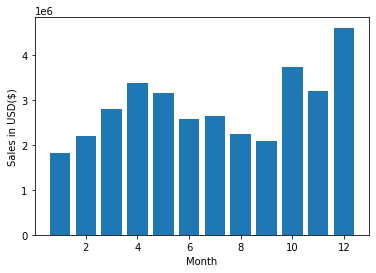

In [70]:
import matplotlib.pyplot as plt
results = all_data.groupby('Month').sum()
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales in USD($)')
#plt.legend()
plt.show()

<h2>what US city had the highest number of sales?</h2>

In [78]:
#by using groupby
results = all_data.groupby('City').sum()
results
  


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16601,2779758.20,104787,2795348.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33288,5421431.39,208318,5452566.96
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


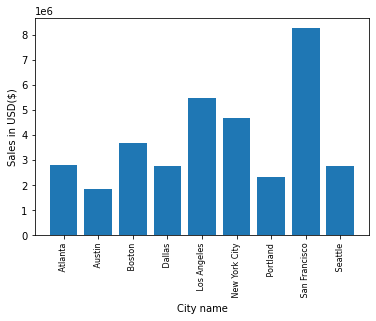

In [80]:
import matplotlib.pyplot as plt
results = all_data.groupby('City').sum()
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation ='vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City name')
#plt.legend()
plt.show()

<h2>Q3: What time shouldwe display advertisement to maximize likihood to customer's buying products</h2>

In [81]:
#convert the data into datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [84]:
#creating hr and min columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,State,Hour,Minute
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,Seattle,WA,8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,Atlanta,GA,12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,Atlanta,GA,10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,Seattle,WA,2,13


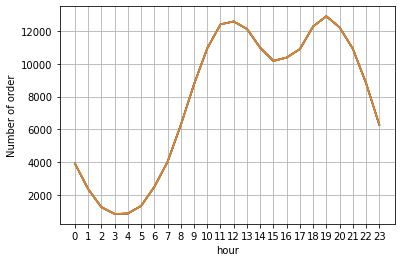

In [90]:
hours = [hour for hour, df in all_data.groupby('Hour')]
all_data.groupby(['Hour']).count().head(10)

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('hour')
plt.ylabel('Number of order')
plt.grid()
plt.show()
#all_data.groupby(['Hour']).count().head(10)
#recommendation is around 11am (11) or 7pm (19)

home work create the chart for particular city

<h2>Q4: what products are most often sold together</h2>

In [100]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

#use transform()
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#dropping the duplicates with values
df = df[['Order ID','grouped']].drop_duplicates()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,grouped
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"
...,...,...
186700,278653,"iPhone,Lightning Charging Cable"
186745,278697,"Wired Headphones,27in 4K Gaming Monitor"
186755,278706,"Google Phone,USB-C Charging Cable"
186760,278710,"USB-C Charging Cable,27in FHD Monitor"


In [105]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [114]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<h2>Q5: What product sold the most? Why do you think it sold the most?</h2>

In [106]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,State,Hour,Minute
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,Seattle,WA,8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,Atlanta,GA,12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,Atlanta,GA,10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,Seattle,WA,2,13
5,222915,Bose SoundSport Headphones,1,99.99,2019-07-03 18:30:00,"899 Elm St, San Francisco, CA 94016",7,99.99,San Francisco,San Francisco,CA,18,30


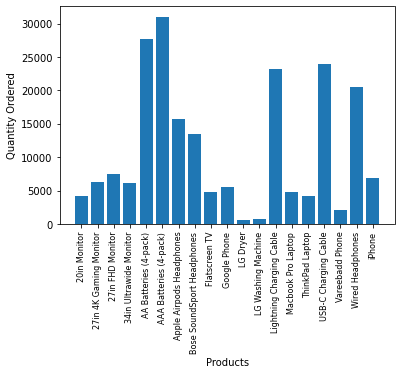

In [113]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

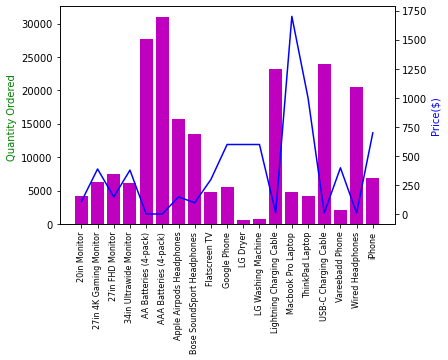

In [124]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'm')
ax2.plot(products,prices, 'b-')

ax1.set_ylabel('Product Name')
ax1.set_ylabel('Quantity Ordered ', color='g')
ax2.set_ylabel('Price($)', color ='b')

ax1.set_xticklabels(products, rotation= 'vertical', size=8)
plt.show()